## XGBoost Demo for Ranking

This notebook demonstrates using XGBoost as a Ranking classifier. You are allowed to use and/or modify this code for the Project (Part-2).

In [1]:
import numpy as np
import xgboost as xgb

In [2]:
xgb.__version__

'0.90'

### Generate Random Features and labels for Training Data

At first, we generate some random features to train the XGBoost Classifier. For the project, you will be required to use the data provided (explained in `6714_proj_part2.ipynb`) to generate your features.

For this example, we assume:<br>

* We have 5 mentions in the training data, with total number of candidate entities for each mention as follows: [5, 4, 4, 3, 4].

* We form pairs of the form: $(mention,candidate\_entity)$, so we will have 20 pairs (for 5 mentions) in total $\sim \; \sum_{i=1}^{N}{\#c_{m_i}}$, where $\#c_{m_i}$ corresponds to the number of candidates of the mention $m_{i}$. We consider the candidate entities corresponding to each mention as a seperate group.

* For each <mention, entity> pair, we may generate some features using men_docs ($men\_docs.pickle$) and entity description pages ($parsed\_candidate\_entities.pickle$). For illustration, we randomly generate some features (d-dimensional). For 20 <mention, entity> pairs, we will have a fearure matrix of the shape $(20 \times d)$.

In [3]:
## Randomly Generate Features for Training....

### Set Numpy Seed
np.random.seed(23)

### We generate random features (13-dim). The feature matrix will be of the shape: (20,13)
train_data = np.random.rand(20, 13)
#print(train_data)
train_data.shape

(20, 13)

### Labels for the Training data

* Next, we assign labels to each <mention,entity> pair in the training data, such that:
> * The Ground Truth entity Label is assigned a label (1) and is positioned at the start of the group (although, strictly speaking you may place the Ground Truth label at any position within the group, we do so in order to facilitate explanation). <br>
> * The rest of the <mention, entity> pairs are assigned a label (0).

**Note:** The features generated from each <mention, entity> pair should also follow the same order as that of the labels in each group.

In [4]:
## Labels for training data...
train_labels = np.array([1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0])

### Groups:

Here, we form groups for the training data, i.e., represent total number of candidate entities corresponding to each mention in the training data. [5, 4, 4, 3, 4] means that the first mention contains 5 candidate entities, second mention contains 4 candidate entities and so on...

In [5]:
## Form Groups...

idxs = np.where(train_labels == 1)[0]#找到所有label是1的index
print('idxs: ',idxs)
train_groups = np.append(np.delete(idxs, 0), len(train_labels)) - idxs #找到每个mention分别有几个candidate
print('train_groups: ',train_groups)
#np.append(np.delete(idxs, 0), len(train_labels))

idxs:  [ 0  5  9 13 16]
train_groups:  [5 4 4 3 4]


### Transform Data for XGBoost...

For model training, $XGBoost$ expects a `DMatrix`. Here, we transform our training data to XGboost's `DMatrix` form. For illustration, you may check-out the documentation of the $XGBoost$ classifier: https://xgboost.readthedocs.io/en/latest/python/python_api.html

In [7]:
def transform_data(features, groups, labels=None):
    xgb_data = xgb.DMatrix(data=features, label=labels)
    xgb_data.set_group(groups)
    return xgb_data


xgboost_train = transform_data(train_data, train_groups, train_labels)


### Generate Features for the Test data

We follow the same steps, as described previously, to randomly generate some features for testing.

In [8]:
## Randomly Generate Features for Testing....

## Set Numpy Random seed...
np.random.seed(53)

## Generate features of same dimensionality as that of training features...
test_data = np.random.rand(10, 13)
print(test_data)

## Assign Groups, assuming there are 3 mentions, with 3, 3 and 4 candidate entities...
test_groups = np.array([3, 3, 4])

# Transform the features to XGBoost DMatrix...
xgboost_test = transform_data(test_data, test_groups)


[[0.84666241 0.56116554 0.4548754  0.35217491 0.58585138 0.53574974
  0.82745628 0.2645422  0.47837906 0.34778502 0.13447832 0.25997735
  0.04763468]
 [0.3942933  0.37161619 0.55673292 0.89749455 0.16734589 0.40720642
  0.65235334 0.56774908 0.56651886 0.5243551  0.60758002 0.12822787
  0.18932563]
 [0.44118762 0.8620341  0.89698484 0.22892947 0.46628086 0.47056135
  0.42573409 0.97000412 0.82589607 0.70491561 0.30427577 0.14910093
  0.94134411]
 [0.77717993 0.24571739 0.71107965 0.2676849  0.86669559 0.23279542
  0.2208466  0.02835486 0.49588516 0.72578247 0.34888512 0.25342074
  0.81904977]
 [0.82679332 0.05006364 0.85396378 0.69767297 0.06041969 0.39429315
  0.53446562 0.16026462 0.94110301 0.03090208 0.73155512 0.12956341
  0.36066609]
 [0.04273941 0.63357783 0.72758712 0.69127487 0.83543403 0.94078074
  0.82748791 0.7079669  0.5466595  0.63419059 0.89571048 0.87200407
  0.63660716]
 [0.06100773 0.68483392 0.47766207 0.71093358 0.21140509 0.70134567
  0.89776649 0.67944913 0.193056

### Model Training + Prediction

After feature generation, and data transformation, the next step is to set hyper-parameters of the $XGBoost$ classifier and and train our model. Once the model is trained, we use it to generate predictions for the testing data.

**Note:** We use `rank:pairwise` as the objective function of our model.

In [12]:
from matplotlib import pyplot

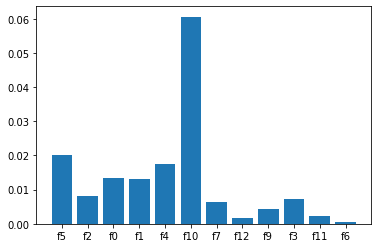

array([ 1.9488156 ,  1.3665856 , -0.5284684 ,  2.244585  ,  0.35798523,
       -1.124747  , -1.0875067 ,  2.936254  ,  2.4660757 , -0.9213451 ],
      dtype=float32)

In [13]:
## Parameters for XGBoost, you can fine-tune these parameters according to your settings...
param = {'max_depth': 8, 'eta': 0.05, 'silent': 1, 'objective': 'rank:pairwise',
         'min_child_weight': 0.01, 'lambda':100}

## Train the classifier...
classifier = xgb.train(param, xgboost_train, num_boost_round=4900)

importance = classifier.get_score(importance_type='gain')
x = importance.keys()
y = importance.values()
pyplot.bar(x,y)
pyplot.show()
##  Predict test data...
preds = classifier.predict(xgboost_test)
preds

### Prediction scores of Each Testing Group...

We can separetely consider the prediction score of each group to get the final entity corresponding to each mention. Based on the prediction scores for each group, you may select the best candidate entity for the testing mention.

In [26]:
idx = 0

for iter_, group in enumerate(test_groups):
    print("Prediction scores for Group {} = {}".format(iter_,preds[idx:idx+group]))
    idx+=group

Prediction scores for Group 0 = [ 1.9488156  1.3665856 -0.5284684]
Prediction scores for Group 1 = [ 2.244585    0.35798523 -1.124747  ]
Prediction scores for Group 2 = [-1.0875067  2.936254   2.4660757 -0.9213451]


In [5]:
import numpy as np
a = np.array([1,2,3])
a.max()

3

In [4]:
a.tolist().index(3)

2